# Single-Layer Perceptron, Neural Networks and Email Classification 


**Acknowledgment**: Noah Smith, Chris Ketelsen, Chenhao Tan 

Name: Toshal Ghimire 

In [2]:
import math
import pickle
import gzip
import numpy as np
import pandas
import matplotlib.pylab as plt
%matplotlib inline

Single-Layer and Multilayer Perceptron Learning
---

**Part A** : Consider learning the following concepts with either a single-layer or multilayer perceptron where all hidden and output neurons utilize *indicator* activation functions. For each of the following concepts, state whether the concept can be learned by a single-layer perceptron. Briefly justify your response by providing weights and biases as applicable:

i. $~ \texttt{ NOT } x_1$

ii. $~~x_1 \texttt{ NAND } x_2$

iii. $~~x_1 \texttt{ XNOR } x_2$ (output 1 when $x_1 = x_2$ and 0 otherwise)

In [3]:
x1 = [0,1,0,1]
x2 = [0,0,1,1]

def sign(x):
    return 1 if x >= 0 else 0

# NOT x1 
weight = [-1]
bias = 0.5

def testNOT(x1,weight,bias):
    for i in range(len(x1)):
        z = weight[0]*x1[i]  + bias
        a = sign(z)
        print("NOT",x1[i],"=",a)

testNOT(x1,weight,bias)
print("With weight",weight,"and bias",bias,"percption learning can learn NOT x1\n")


# x1 NAND x2 
weight = [-1,-1]
bias = 1.5

#test
def testNAND(x1,x2,weight,bias):
    for i in range(len(x1)):
        z = weight[0]*x1[i] + weight[1]*x2[i] + bias
        a = sign(z)
        print(x1[i],"NAND",x2[i],"=",a)

testNAND(x1,x2,weight,bias)
print("With weight",weight,"and bias",bias,"percption learning can learn x1 NAND x2\n")

print("Since XNOR is not linearly seperable a single layer perception algroithm cannot learn it")


NOT 0 = 1
NOT 1 = 0
NOT 0 = 1
NOT 1 = 0
With weight [-1] and bias 0.5 percption learning can learn NOT x1

0 NAND 0 = 1
1 NAND 0 = 1
0 NAND 1 = 1
1 NAND 1 = 0
With weight [-1, -1] and bias 1.5 percption learning can learn x1 NAND x2

Since XNOR is not linearly seperable a single layer perception algroithm cannot learn it


**Part B** : Determine an architecture and specific values of the weights and biases in a single-layer or multilayer perceptron with *indicator* activation functions that can learn $x_1 \texttt{ XNOR } x_2$. Describe your architecture and state your weight matrices and bias vectors in Markdown below. Then demonstrate that your solution is correct by implementing forward propagation for your network in Python and showing that it correctly produces the correct boolean output values for each of the four possible combinations of $x_1$ and $x_2$.

This can be learned if we first take the NAND of x1 and x1 then take the NOR of x1 and x2 then finaly taking the OR of the outputs of NAND and NOR 

In [4]:
x1 = [0,1,0,1]
x2 = [0,0,1,1]

def sign(x):
    return 1 if x >= 0 else 0

# First compute AND 
def AND(x1,x2):
    weight = [1,1]
    bias = -1.5
    out = []
    for i in range(len(x1)):
        z = weight[0]*x1[i] + weight[1]*x2[i] + bias
        a = sign(z)
        out.append(a)
    return out

output1 = AND(x1,x2)

# then compute NOR


def NOR(x1,x2):
    weight = [-1,-1]
    bias = 0.5
    out = []
    for i in range(len(x1)):
        z = weight[0]*x1[i] + weight[1]*x2[i] + bias
        a = sign(z)
        out.append(a)
    return out

output2 = NOR(x1,x2)

# finaly do OR between output 1 and output 2 to compute x1 XNOR x2



def OR(x1,x2):
    weight = [1,1]
    bias = -0.5
    out = []
    for i in range(len(x1)):
        z = weight[0]*x1[i] + weight[1]*x2[i] + bias
        a = sign(z)
        out.append(a)
    return out

XNOR = OR(output1,output2)
print("x1 XNOR X2 =",XNOR)


x1 XNOR X2 = [1, 0, 0, 1]


In [5]:
def getXNOR(x1,x2):
    output1 = AND(x1,x2)
    output2 = NOR(x1,x2)
    XNOR = OR(output1,output2)
    return XNOR

getXNOR(x1,x2)

[1, 0, 0, 1]

by doing x1 AND x2 = out1 and x1 NOR x2 = out2
then finlay doing out1 OR out2 i was able to achive the effect of doing x1 XNOR x2 

The weights and bias are inside the AND,NOR & OR functions

Back propagation
---


In this problem you'll gain some intuition about why training deep neural networks can be very time consuming.  Consider training the chain-like neural network seen below: 

![chain-like nn](figs/chain_net.png)

Note that this network has three weights $W^1, W^2, W^3$ and three biases $b^1, b^2,$ and $b^3$ (for this problem you can think of each parameter as a single value or as a $1 \times 1$ matrix). Suppose that each hidden and output neuron is equipped with a sigmoid activation function and the loss function is given by 

$$
\ell(y, a^4) = \frac{1}{2}(y - a^4)^2  
$$

where $a^4$ is the value of the activation at the output neuron and $y \in \{0,1\}$ is the true label associated with the training example. 

**Part A**: Suppose each of the weights is initialized to $W^k = 1.0$ and each bias is initialized to $b^k = -0.5$.  Use forward propagation to find the activities and activations associated with each hidden and output neuron for the training example $(x, y) = (0.5,0)$. Show your work. 

This network will result in a loop given the current x value of 0.5

Because our weights are 1 and biases -0.5 for each **K** we calcuate **$a^k$** by: (where $x = a^1$) 
$$z^1 = W^1 ~a^1 + bias^1$$
$$z^1 = (1) ~0.5 + (-0.5)$$
$$z^1 = 0$$
$$a^2 = Sigmoid(z^1) = Sigmoid(0) = 0.5 $$

now following the same pattern 
$$z^2 = W^2 ~a^2 + bias^2$$
$$z^2 = (1) ~0.5 + (-0.5)$$
$$z^2 = 0$$
$$a^3 = Sigmoid(z^2) = Sigmoid(0) = 0.5$$

again with the 3rd set of weights and bias
$$z^3 = W^3 ~a^3 + bias^3$$
$$z^3 = (1) ~0.5 + (-0.5)$$
$$z^3 = 0$$
$$a^4 = Sigmoid(z^3) = Sigmoid(0) = 0.5$$

Beacuse the weights are 1 and bias is -0.5 and the x input is 0.5 we end up looping and getting the same output each time beacuse of our chosen activition function, $a^4$ = 0.5

In [6]:
def sigmoid(x):
    return 1/(1+math.exp(-x))

weight,bias = [1], -0.5
x = 0.5
y = 0

a1 = x

#weight1,weight2,weight3 = 0.935, 0.984375 , 0.99609375
#bias1,bias2,bias3 =  -0.625,-0.53125,-0.5078125

z1 = np.dot(weight,a1) + bias
a2 = sigmoid(z1)
print("z1",z1,"\ta1:",a2)

z2 = np.dot(weight,a1) + bias
a3 = sigmoid(z2)
print("z2",z2,"\ta2:",a2)

z3 = np.dot(weight,a2) + bias
a4 = sigmoid(z3)
print("z3",z3,"\ta3:",a3)

loss = 1/2 * pow((0 - a4),2)
print("loss:",loss)

z1 [0.] 	a1: 0.5
z2 [0.] 	a2: 0.5
z3 [0.] 	a3: 0.5
loss: 0.125


**Part B**: Use Back-Propagation to compute the weight and bias derivatives $\partial \ell / \partial W^k$ and $\partial \ell / \partial b^k$ for $k=1, 2, 3$.  Show all work. 

$$\frac{\partial \ell }{ \partial W^3} = \frac{\partial \ell}{\partial a^4} ~ \frac{\partial a^4 }{ \partial z^3} ~ \frac{\partial z^3 }{ \partial W^3}$$

To update $W^3$ we must find the values of the partial derivatives of the function above
<br>

#### THE FUNCTIONS
$$ z = a^2W^3 + b^3$$ 
$$ a^l = \frac{1}{1+e^-{(z^l)}} : \sigma(z^l) $$
$$ \ell = \frac{1}{2}(y - a^4)^2 $$

<br>
#### derivative of loss
$$ \frac{\partial \ell}{\partial a^4}  = (y -a^4)(-1)$$
$$ = (0 - 0.5)(-1) $$
$$ = 0.5 $$

#### derivative of activation (sigmoid) aka g'(z^3)
<br>
$$ \frac{\partial a^4 }{ \partial z^3}  = \sigma(-z^3) (1- \sigma(-z^3))$$
     The $\sigma(-z^3)$ is the value $a^4$ obtained from forward-propagation
$$ = a^4 (1- a^4)$$
$$ = 0.5 (1- 0.5)$$
$$ = 0.25 $$
<br>
$$ \delta^3 =  \frac{\partial \ell}{\partial a^4} ~ \frac{\partial a^4 }{ \partial z^3} $$
$$ \delta^3 =  0.5 ~ 0.25 $$
$$ \delta^3 =  0.125 $$


<br>
#### derivative of dot product z
$$\frac{\partial z^3 }{ \partial W^3} = a^3$$
$$= 0.5$$

so then we can calculate $\frac{\partial \ell }{ \partial W^3} $

$$\frac{\partial \ell }{ \partial W^3} = \frac{\partial \ell}{\partial a^4} ~ \frac{\partial a^4 }{ \partial z^3} ~ \frac{\partial z^3 }{ \partial W^3}$$

$$ = (0.5) ~(0.25) ~ (0.5)$$
$$ = 0.0625 $$

we can now update the weight with (learning rate)$\eta$ = 1

$$W^3 = W^3 - \eta ~ \frac{\partial \ell }{ \partial W^3} $$
$$W^3 = 1.0 - \eta ~ 0.0625 $$
$$W^3 = 0.935 $$

for bias we would need to do the same steps but instead of $\frac{\partial \ell }{ \partial W^3}$ we would do $\frac{\partial \ell }{ \partial b^3}$ and the only thing that would change in the equation would be the value of $\frac{\partial z^3 }{ \partial W^3}$ to $\frac{\partial z^3 }{ \partial b^3}$ which is the just 1 ( since $z'^{3}= a^3W^3 + b^3 = 0 + 1  = 1 $) so we are just computing $\frac{\partial \ell}{\partial a^4} ~ \frac{\partial a^4 }{ \partial z^3}$
$$ \frac{\partial \ell }{ \partial b^3} = \frac{\partial \ell}{\partial a^4} ~ \frac{\partial a^4 }{ \partial z^3} $$
$$ = 0.5 ~ 0.25 $$
$$ = 0.125 $$

$$ b^3 = b^3 - \frac{\partial \ell}{\partial b^3}$$
$$ b^3 = -0.5 - 0.125$$
$$ b^3 = -0.625$$

so basicly we will have to solve for weight and bias based on this equation since $\frac{\partial z^l }{ \partial W^l}$ = $a^{l-1}$
$$\frac{\partial \ell }{ \partial W^l} = \delta^l a^{l-1}$$
$$\frac{\partial \ell }{ \partial b^l} = \delta^l $$


But $\delta^2$ depends on $\delta^3$

since we calcuated $\delta^3$ to find remaining $W^l$ we must find 
$$ \delta^l = W^{l+1}\delta^{l+1} \bullet g'(z^l) $$
$$ \frac{\partial \ell }{ \partial W^l} = \delta^l~a^{l-1} $$



<br><br>
## $W^2$
$$\delta^2 = W^2 \delta^3 \bullet g'(z^2) $$
$$\frac{\partial \ell }{ \partial W^2} = \delta^2 (a^1) $$

$$\delta^2 = w^2 \delta^3 \bullet g'(z^2) $$
from part A we know $w^2$ and $z^2$ and $\delta^3$ from above
$$\delta^2 = (1) (0.125) \bullet g'(0) $$
$$\delta^2 = (1) (0.125) (0.25) $$
$$\delta^2 = 0.03125 $$

$$\frac{\partial \ell }{ \partial W^2} = \delta^2 (a^1) $$
$$\frac{\partial \ell }{ \partial W^2} = 0.3125 (0.5) $$
$$\frac{\partial \ell }{ \partial W^2} = 0.015625 $$

$$W^2 = W^2 - 0.015625 $$
$$W^2 = 0.984375 $$





## $W^1$
$$\delta^1 = W^1 \delta^2 \bullet g'(z^1) $$
$$\frac{\partial \ell }{ \partial W^1} = \delta^1 (a^0) $$

$$\delta^1 = W^1 \delta^2 \bullet g'(z^1) $$
from part A we know $w^1$ and $z^1$ and $\delta^3$ from above
$$\delta^1 = (1) (0.03125) \bullet g'(0) $$
$$\delta^1 = (1) (0.03125) (0.25) $$
$$\delta^1 = 0.0078125 $$

$$\frac{\partial \ell }{ \partial W^1} = \delta^1 (a^0) $$
$$\frac{\partial \ell }{ \partial W^1} = 0.0078125 (0.5) $$
$$\frac{\partial \ell }{ \partial W^1} = 0.00390625$$

$$W^2 = W^1 - 0.00390625 $$
$$W^2 = 0.99609375 $$

In [7]:
print("After back propagation the weights that i found were:")
print("Weight 1: 0.935")
print("Weight 2: 0.984375")
print("Weight 3: 0.99609375")

#we wernt asked for bias but here it is anyway
print("\nAfter back propagation the Bias that i found were:")
print("Bias 1: -0.625")
print("Bias 2: -0.53125")
print("Bias 3: -0.5078125")


After back propagation the weights that i found were:
Weight 1: 0.935
Weight 2: 0.984375
Weight 3: 0.99609375

After back propagation the Bias that i found were:
Bias 1: -0.625
Bias 2: -0.53125
Bias 3: -0.5078125


**PART C** Implement following activation functions:
* Relu
* Sigmoid
* softmax

In [8]:
import math

def relu(x):
    return x if x >0 else 0

def sigmoid(x):
    return 1/(1+math.exp(-x))

def soft_max(x):
    out = []
    SUM = 0
    for i in x:
        SUM += math.exp(i)
        
    for i in x:
        out.append(math.exp(i)/SUM)
        
    return out

In [10]:
assert relu(5) == 5
assert relu(-5) == 0
assert relu(0) == 0
assert relu(5) == 5

assert sigmoid(0.458) == 0.61253961344091512
assert sigmoid(2) == 0.8807970779778823
res = soft_max([1,2,4])
temp = [0.04201007, 0.1141952 , 0.84379473]
for i in range(len(temp)):
    assert res[i] - temp[i] < 1e-5

**PART D** Implement the following Loss functions:
* mean squared error
* mean absolute error
* hinge

In [11]:
def mean_squared_error(yhat,y):
    if(len(yhat) != len(y)):
        return
    
    SUM = 0
    for ii in range(len(y)):
        SUM += pow(y[ii]-yhat[ii],2)
        
    loss = SUM/len(y)
    return loss
    
    
def mean_absolute_error(yhat,y):
    if(len(yhat) != len(y)):
        return
    SUM = 0
    for ii in range(len(y)):
        SUM += abs(y[ii]-yhat[ii])
        
    loss = SUM/len(y)
    return loss

def hinge(yhat,y):
    if(len(yhat) != len(y)):
        return
    
    SUM = 0
    for ii in range(len(y)):
        MAX = max(0,1 - y[ii]*yhat[ii])
        SUM += MAX
    
    loss = SUM/len(y)
    return loss
    

In [12]:
y_true = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])
assert mean_squared_error(y_pred,y_true) == 0.375
assert mean_absolute_error(y_pred,y_true) == 0.5
assert hinge(y_pred,y_true) == 0.25

**PART E** Explain the vanishing gradient problem, when would you observe this?

The vanishing gradient problem is a problem in which the gradiaent  will be vanishingly small. It is caused by the update value being proportional to the gradient of the error function W.R.T current weights. It can cause the network become really hard to learn and tune the parameters of the earlier layers. Which prevents the weights from updating its value. This problem could end up stoping the network from training/learning. we observe this when there are many hidden layers.

[25 Points] Problem 3 - Build a feedForward neural network
---

In this problem you'll implement a general feed-forward neural network class that utilizes sigmoid activation functions. Your tasks will be to implement forward propagation, prediction, back propagation, and a general train routine to learn the weights in your network via stochastic gradient descent.

The skeleton for the network class is below. Note that this class is almost identical to the one you worked with in the hands-On neural network in-class notebook, so you should look there to remind yourself of the details. Scroll down to find more information about your tasks as well as unit tests.

In [13]:
import argparse
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt


class Network:
    def __init__(self, sizes):
        self.L = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(n, 1) for n in self.sizes[1:]]
        self.weights = [np.random.randn(n, m) for (
            m, n) in zip(self.sizes[:-1], self.sizes[1:])]
        

    def g(self, z):
        """
        activation function
        """
        return sigmoid(z)

    def g_prime(self, z):
        """
        derivative of activation function
        """
        return sigmoid_prime(z)

    def forward_prop(self, a):
        """
        memory aware forward propagation for testing
        only.  back_prop implements it's own forward_prop
        """
        
        for W, b in zip(self.weights, self.biases):
            z = np.dot(W, a) + b
            a = self.g(z)
          
        return a
            

    def grad_cost(self, a, y):
        """
        gradient of cost function
        Assumes C(a,y) = (a-y)^2/2
        """
        return (a - y)

    def SGD_train(self, train, epochs, eta, lam=0.0, verbose=True, test=None,random=False):
        """
        SGD for training parameters
        epochs is the number of epocs to run
        eta is the learning rate
        lam is the regularization parameter
        If verbose is set will print progressive accuracy updates
        If test set is provided, routine will print accuracy on test set as learning evolves
        """
        n_train = len(train)
      
        for epoch in range(epochs):
            
            # Shuffleing data within each epochs
            shuffle_ind = np.random.permutation(train)
            
            for ind in range(n_train):
                x = shuffle_ind[ind][0]
                y = shuffle_ind[ind][1]

                dw, db = self.back_prop(x,y)

                # Updating weights using dl/dw and bias using dl/wb from back propagation
                for ii in range(self.L-1):
                    self.weights[ii] = self.weights[ii] - eta*(lam * self.weights[ii] + dw[ii])
                    self.biases[ii] = self.biases[ii] - eta*db[ii]

           
            # Printing the process
            if verbose:
                if epoch == 0 or (epoch + 1) % 15 == 0:
                    acc_train = self.evaluate(train)
                    if test is not None:
                        acc_test = self.evaluate(test)
                        # epoch_accuracy_list.append((acc_test,acc_train))    #omit
                        print("Epoch {:4d}: Train {:10.5f}, Test {:10.5f}".format(
                            epoch+1, acc_train, acc_test))
                        
                        self.train_acc = acc_train
                        self.test_acc = acc_test
                    else:
                        print("Epoch {:4d}: Train {:10.5f}".format(
                            epoch+1, acc_train))

    def back_prop(self, x, y):
        """
        Back propagation for derivatives of C wrt parameters
        """
        db_list = [np.zeros(b.shape) for b in self.biases]
        dW_list = [np.zeros(W.shape) for W in self.weights]

            
        a = x
        a_list = [a]
        z_list = [np.zeros(a.shape)]  # Pad with throwaway so indices match
        
        # Preform forward propagation 
        for W, b in zip(self.weights, self.biases):
            z = np.dot(W, a) + b
            z_list.append(z)
            a = self.g(z)
            a_list.append(a)

        # initilize delta to zeros
        delta = [np.zeros((n, 1)) for n in self.sizes]
        ##print("inital delta:",delta)

        # set delta for the last layer 
        delta[self.L - 1 ] = self.g_prime(z_list[self.L-1]) *self.grad_cost(a_list[self.L-1],y)
        ##print("last delta:",delta[self.L - 1 ])
        
        # Back propagation done here
        for ll in range(self.L-2,-1,-1):
            dW_list[ll] = np.dot(delta[ll+1],a_list[ll].T)
            db_list[ll] = delta[ll+1]
            delta[ll] = np.dot(self.weights[ll].T,delta[ll+1]) *self.g_prime(z_list[ll])
        
        return (dW_list, db_list)

    def evaluate(self, test):
        """
        Evaluate current model on labeled test data
        """
        ctr = 0
        for x, y in test:
            yhat = self.forward_prop(x)
            ctr += np.argmax(yhat) == np.argmax(y)
        return float(ctr) / float(len(test))


def sigmoid(z, threshold=20):
    z = np.clip(z, -threshold, threshold)
    return 1.0/(1.0+np.exp(-z))


def sigmoid_prime(z):
    return sigmoid(z) * (1.0 - sigmoid(z))


def mnist_digit_show(flatimage, outname=None):

    import matplotlib.pyplot as plt

    image = np.reshape(flatimage, (-1, 14))

    plt.matshow(image, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    if outname:
        plt.savefig(outname)
    else:
        plt.show()
        
        

**PART A** Implement *SGD_train, back_prop,forward_prop*. Use the following test cases to verify if the code is working as expected.

In [14]:
%run -i tests/tests3.py

ERROR:root:File `'tests/tests.py'` not found.


** PART B **

Run the above Network on MNIST Dataset and report the following (feel free to experiment with different learning rates).
* Define the hidden layer dimension appropriate for this dataset and report the accuracy for 200 epochs.

**answer:** With a low hidden layer dimension (2) I was only able to get 34% test accuracy with my NN, but with a hidden layer dimension of 10 The best accuracy I was able to attain was 96% train and 85% test accurcy. when increasing the dimension to 20 the best i could classify was 97% train and 86% test accuracy. Which was basicly the same as using 10 dimensions.

* Explain the effect of hidden dimension with appropriate plots (check training accuracy and test accuracy). 

**answer**: graph is below

* Explain the effect of number of epochs on MNIST Data.

**answer:** epoch 1 for almost all cases was very low for train and test accuracy. But after reaching epoch 15 it jumped up to around 70-85% test and test accuracy. The reamining 185 epoch I was only able to notice an increase of around 5-8% test accuracy and usualy a 7-10% increase in train accuracy. **Takeaway:** epoch after a certian amount will barley change the test accuracy

In [147]:
location = './data/tinyMNIST.pkl.gz'
f = gzip.open(location, 'rb')
u = pickle._Unpickler(f)
u.encoding = 'latin1'
train, test = u.load()
input_dimensions = len(train[0][0])
output_dimensions = len(train[0][1])
hidden_layer_dimensions = 10
print('Number of Input Features: ', input_dimensions)
print('Number of Output classes: ', output_dimensions)
print('\nHidden Layer Dimensions: ', hidden_layer_dimensions)
nn = Network([input_dimensions, hidden_layer_dimensions, output_dimensions])
nn.SGD_train(train, epochs=200, eta=0.1, lam=0.0001, verbose=True, test=test,random=True)

Number of Input Features:  196
Number of Output classes:  10

Hidden Layer Dimensions:  10
Epoch    1: Train    0.37575, Test    0.34854
Epoch   15: Train    0.89756, Test    0.81353
Epoch   30: Train    0.92317, Test    0.83473
Epoch   45: Train    0.93637, Test    0.84274
Epoch   60: Train    0.93958, Test    0.84874
Epoch   75: Train    0.94278, Test    0.85114
Epoch   90: Train    0.94598, Test    0.85474
Epoch  105: Train    0.94078, Test    0.85754
Epoch  120: Train    0.94878, Test    0.85794
Epoch  135: Train    0.94958, Test    0.85874
Epoch  150: Train    0.94958, Test    0.86194
Epoch  165: Train    0.94718, Test    0.86475
Epoch  180: Train    0.94838, Test    0.85594
Epoch  195: Train    0.94558, Test    0.86275


In [13]:
# RUN CELL WITH CARE!!! 
# Since this cell took 10+ minutes to run
# I commented it out and manualy saved the varibles in the cell 
# below, if you wish to run this cell uncomment it and 
# also uncomment the assinment of train and test ACC in the cell
# below

'''
input_dimensions = len(train[0][0])
output_dimensions = len(train[0][1])

trainACC = []
testACC = []

for ii in range(16):
    print("Hidden layer dimension:",ii)
    hidden_layer_dimensions = ii+1
    nn = Network([input_dimensions, hidden_layer_dimensions, output_dimensions])
    nn.SGD_train(train, epochs=100, eta=0.1, lam=0.0001, verbose=True, test=test,random=True)

    trainACC.append(nn.evaluate(train))
    testACC.append(nn.evaluate(test))

'''
0


0

Text(0.5, 1.0, 'Train vs Test Accuracy with 100 epochs')

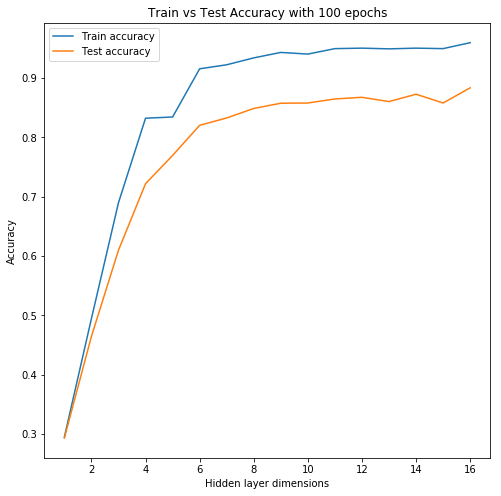

In [148]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
epoch = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

# COMMENT OUT IF YOU PLAN ON RUNNING THE CELL ABOVE 
trainACC = [0.29491796718687474, 0.49459783913565425, 0.689875950380152, 0.8323329331732693, 0.8343337334933973, 0.9155662264905963, 0.9223689475790317, 0.9339735894357744, 0.9431772709083633, 0.9403761504601841, 0.9495798319327731, 0.9503801520608244, 0.9491796718687475, 0.9503801520608244, 0.9495798319327731, 0.9595838335334134]
testACC = [0.2933173269307723, 0.4645858343337335, 0.60984393757503, 0.7218887555022009, 0.7695078031212484, 0.820328131252501, 0.8327330932372949, 0.8487394957983193, 0.8575430172068828, 0.8579431772709084, 0.8647458983593438, 0.867547018807523, 0.860344137655062, 0.8727490996398559, 0.8579431772709084, 0.8835534213685474]


ax.plot(epoch,trainACC,label="Train accuracy")
ax.plot(epoch,testACC,label="Test accuracy")
ax.legend()
ax.set_xlabel("Hidden layer dimensions")
ax.set_ylabel("Accuracy")
ax.set_title("Train vs Test Accuracy with 100 epochs")


####Implement *Dropout layer* and explain the impact on performance


In [149]:
#Implementing a drop out layer
import argparse
import numpy as np
import pickle
import gzip
import matplotlib.pyplot as plt
import random

class NetworkDropout:
    def __init__(self, sizes):
        self.L = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(n, 1) for n in self.sizes[1:]]
        self.weights = [np.random.randn(n, m) for (
            m, n) in zip(self.sizes[:-1], self.sizes[1:])]
        

    def g(self, z):
        return sigmoid(z)

    def g_prime(self, z):
        return sigmoid_prime(z)

    def forward_prop(self, a):
        
        for W, b in zip(self.weights, self.biases):
            z = np.dot(W, a) + b
            a = self.g(z)
          
        return a
            

    def grad_cost(self, a, y):
        return (a - y)

    def SGD_train(self, train, epochs, eta, lam=0.0, verbose=True, test=None,random=False):
        """
        SGD for training parameters
        epochs is the number of epocs to run
        eta is the learning rate
        lam is the regularization parameter
        If verbose is set will print progressive accuracy updates
        If test set is provided, routine will print accuracy on test set as learning evolves
        """
        n_train = len(train)
      
        for epoch in range(epochs):
            
            # Shuffleing data within each epochs
            shuffle_ind = np.random.permutation(train)
            
            for ind in range(n_train):
                x = shuffle_ind[ind][0]
                y = shuffle_ind[ind][1]

                dw, db = self.back_prop(x,y)

                # Updating weights using dl/dw and bias using dl/wb from back propagation
                for ii in range(self.L-1):
                    self.weights[ii] = self.weights[ii] - eta*(lam * self.weights[ii] + dw[ii])
                    self.biases[ii] = self.biases[ii] - eta*db[ii]

           
            # Printing the process
            if verbose:
                if epoch == 0 or (epoch + 1) % 15 == 0:
                    acc_train = self.evaluate(train)
                    if test is not None:
                        acc_test = self.evaluate(test)
                        # epoch_accuracy_list.append((acc_test,acc_train))    #omit
                        print("Epoch {:4d}: Train {:10.5f}, Test {:10.5f}".format(
                            epoch+1, acc_train, acc_test))
                        
                        self.train_acc = acc_train
                        self.test_acc = acc_test
                    else:
                        print("Epoch {:4d}: Train {:10.5f}".format(
                            epoch+1, acc_train))

    def back_prop(self, x, y):
        """
        Back propagation for derivatives of C wrt parameters
        """
        db_list = [np.zeros(b.shape) for b in self.biases]
        dW_list = [np.zeros(W.shape) for W in self.weights]

        #dropout_mask = np.random.rand()
        
        
            
        a = x * drop(0.5)
        a_list = [a] 
        z_list = [np.zeros(a.shape)]  # Pad with throwaway so indices match
        
        # Preform forward propagation 
        for W, b in zip(self.weights, self.biases):
            z = np.dot(W, a) + b
            z_list.append(z)
            a = self.g(z) * drop(0.5)
            a_list.append(a)

        # initilize delta to zeros
        delta = [np.zeros((n, 1)) for n in self.sizes]
        ##print("inital delta:",delta)

        # set delta for the last layer 
        delta[self.L - 1 ] = self.g_prime(z_list[self.L-1]) *self.grad_cost(a_list[self.L-1],y)
        ##print("last delta:",delta[self.L - 1 ])
        
        # Back propagation done here
        for ll in range(self.L-2,-1,-1):
            dW_list[ll] = np.dot(delta[ll+1],a_list[ll].T)
            db_list[ll] = delta[ll+1]
            delta[ll] = np.dot(self.weights[ll].T,delta[ll+1]) *self.g_prime(z_list[ll])

        return (dW_list, db_list)

    def evaluate(self, test):
        """
        Evaluate current model on labeled test data
        """
        ctr = 0
        for x, y in test:
            yhat = self.forward_prop(x)
            ctr += np.argmax(yhat) == np.argmax(y)
        return float(ctr) / float(len(test))


def sigmoid(z, threshold=20):
    z = np.clip(z, -threshold, threshold)
    return 1.0/(1.0+np.exp(-z))


def sigmoid_prime(z):
    return sigmoid(z) * (1.0 - sigmoid(z))

def drop(p):
    return 1 if random.random() < p else 0
        

In [150]:
location = './data/tinyMNIST.pkl.gz'
f = gzip.open(location, 'rb')
u = pickle._Unpickler(f)
u.encoding = 'latin1'
train, test = u.load()
input_dimensions = len(train[0][0])
output_dimensions = len(train[0][1])
hidden_layer_dimensions = 10
print('Number of Input Features: ', input_dimensions)
print('Number of Output classes: ', output_dimensions)
print('\nHidden Layer Dimensions: ', hidden_layer_dimensions)
nnD = NetworkDropout([input_dimensions, hidden_layer_dimensions, output_dimensions])
nnD.SGD_train(train, epochs=201, eta=0.1, lam=0.0001, verbose=True, test=test,random=True)

Number of Input Features:  196
Number of Output classes:  10

Hidden Layer Dimensions:  10
Epoch    1: Train    0.22089, Test    0.19528
Epoch   15: Train    0.76711, Test    0.69908
Epoch   30: Train    0.86315, Test    0.79072
Epoch   45: Train    0.88355, Test    0.81593
Epoch   60: Train    0.88756, Test    0.81993
Epoch   75: Train    0.89036, Test    0.81633
Epoch   90: Train    0.89556, Test    0.81673
Epoch  105: Train    0.89396, Test    0.81513
Epoch  120: Train    0.89516, Test    0.82193
Epoch  135: Train    0.89516, Test    0.82113
Epoch  150: Train    0.89636, Test    0.81873
Epoch  165: Train    0.89516, Test    0.81913
Epoch  180: Train    0.89916, Test    0.81673
Epoch  195: Train    0.89436, Test    0.81713


Using a dropout rate of 0.5: the initial training and testing accuracy was much lower in the first epoch after elimnating some hidden layers.But The overall accuracy was about +/- 0.04 from what I was able to achive with the the NN without dropout

Implement RNN Network to classify whether text is spam or ham 
---

Dataset is obtained from UCI Machine Learning repository consisting of SMS tagged messages (being ham (legitimate) or spam) that have been collected for SMS Spam research.


Use [Keras](https://keras.io/) to implement a classifier (you need to install Keras). Update the below snippet to build a Sequential model with an embedding layer, and an LSTM layer followed by a dense layer. This question allows you to get familiar with popular deep learning toolkits and the solution only has a few lines. In practice, there is no need to reinvent the wheels.


Learn more about RNN : https://colah.github.io/posts/2015-08-Understanding-LSTMs/

In [151]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer


class RNN:
    '''
    RNN classifier
    '''

    def __init__(self, train_x, train_y, test_x, test_y, dict_size=5000,
                 example_length=150, embedding_length=32, epoches=5, batch_size=128):
        '''
        initialize RNN model
        :param train_x: training data
        :param train_y: training label
        :param test_x: test data
        :param test_y: test label
        :param epoches: number of ephoches to run
        :param batch_size: batch size in training
        :param embedding_length: size of word embedding
        :param example_length: length of examples
        '''
        self.batch_size = batch_size
        self.epoches = epoches
        self.example_len = example_length
        self.dict_size = dict_size
        self.embedding_len = embedding_length

        # preprocess training data
        tok = Tokenizer(num_words=dict_size)
        tok.fit_on_texts(train_x)
        sequences = tok.texts_to_sequences(train_x)
        self.train_x = sequence.pad_sequences(
            sequences, maxlen=self.example_len)
        sequences = tok.texts_to_sequences(test_x)
        self.test_x = sequence.pad_sequences(
            sequences, maxlen=self.example_len)

        self.train_y = train_y
        self.test_y = test_y
        

        # TODO: build model with Embedding, LSTM and dense layers.
        # refer to Sequence classification with LSTM : https://keras.io/getting-started/sequential-model-guide/#examples
        # Documentation for LSTM layer in : https://keras.io/layers/recurrent/#lstm
        self.model = Sequential()
        self.model.add(Embedding(self.dict_size, self.embedding_len, input_length=self.example_len))
        self.model.add(LSTM(self.embedding_len))
        self.model.add(Dense(1, activation='sigmoid'))
        
        self.model.compile(loss='binary_crossentropy',
                           optimizer='adam', metrics=['accuracy'])

    def train(self, verbose=0):
        '''
        fit in data and train model : refer fit method in https://keras.io/models/model/
        make sure you use batchsize and epochs appropriately.
        :return:None
        '''
        self.model.fit(self.train_x, self.train_y, batch_size=self.batch_size, epochs=self.epoches,verbose=verbose)


    def evaluate(self,verbose=0):
        '''

        evaluate trained model : Please refer evaluate in https://keras.io/models/model/
        :return: [loss,accuracy]
        '''
        out = self.model.evaluate(self.test_x, self.test_y, batch_size=self.batch_size, verbose=verbose)
        return out


Complete the following functions *init, train and evaluate functions* and report the accuracy

In [155]:
import keras
assert keras.__version__ == '2.2.2'

In [156]:
import pickle
def load_data(location):
    return pickle.load(open(location,'rb'))
train_x, test_x, train_y, test_y = load_data('./data/spam_data.pkl')


In [157]:
train_x, test_x, train_y, test_y = load_data('./data/spam_data.pkl')
rnn = RNN(train_x, train_y, test_x, test_y, epoches=5)
rnn.train(verbose=1)

print("\nEvaluating test data")
accuracy = rnn.evaluate(verbose=1)
print('\nAccuracy for LSTM: ', accuracy[1])

Epoch 1/5
4736/4736 [==============================] - 9s 2ms/step - loss: 0.4996 - acc: 0.8539
Epoch 2/5
4736/4736 [==============================] - 5s 1ms/step - loss: 0.2219 - acc: 0.9145
Epoch 3/5
4736/4736 [==============================] - 5s 1ms/step - loss: 0.0912 - acc: 0.9831
Epoch 4/5
4736/4736 [==============================] - 5s 1ms/step - loss: 0.0548 - acc: 0.9901
Epoch 5/5
4736/4736 [==============================] - 5s 1ms/step - loss: 0.0354 - acc: 0.9941

Evaluating test data
836/836 [==============================] - 2s 2ms/step

Accuracy for LSTM:  0.9904306220095693


Accuracy after 5 epochs. **I was able to get a testing Accuracy of 0.9904306220095693**

* Change the embedding length and observe the impact on test and train accuracy.

* Explain the impact of embedding length in LSTM Model by providing plots of accuracy vs embedding length.

In [86]:
# NOTE: CELL TAKES SEVERAL MINUTES TO RUN!! so i manualy saved the accList array int he next cell,
# to run the code, uncomment this cell and comment out the second line in the next cell 

'''
train_x, test_x, train_y, test_y = load_data('./data/spam_data.pkl')

n=5
accList =[]
for ii in range(10):
    rnn = RNN(train_x, train_y, test_x, test_y, epoches=5,embedding_length=n)
    rnn.train()
    accuracy = rnn.evaluate()
    accList.append(accuracy[1])
    print("Embedding length:",n,"\tTest accuracy:",accuracy[1])
    n = n+5

'''


Embedding length: 5 	Test accuracy: 0.9270334916822077
Embedding length: 10 	Test accuracy: 0.9772727261319685
Embedding length: 15 	Test accuracy: 0.988038276371203
Embedding length: 20 	Test accuracy: 0.9868421041223991
Embedding length: 25 	Test accuracy: 0.9916267931176145
Embedding length: 30 	Test accuracy: 0.9928229653664182
Embedding length: 35 	Test accuracy: 0.9952153110047847
Embedding length: 40 	Test accuracy: 0.9964114832535885
Embedding length: 45 	Test accuracy: 0.9964114832535885
Embedding length: 50 	Test accuracy: 0.9928229653664182


[]

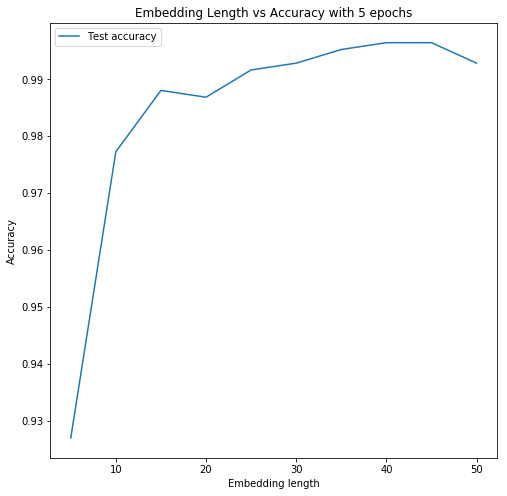

In [159]:
# NOTE: comment out the line below if you plan on running the cell above
accList = [0.9270334916822077, 0.9772727261319685, 0.988038276371203, 0.9868421041223991, 0.9916267931176145, 0.9928229653664182, 0.9952153110047847, 0.9964114832535885, 0.9964114832535885, 0.9928229653664182]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
embed = [5,10,15,20,25,30,35,40,45,50]


ax.plot(embed,accList,label="Test accuracy")
ax.legend()
ax.set_xlabel("Embedding length")
ax.set_ylabel("Accuracy")
ax.set_title("Embedding Length vs Accuracy with 5 epochs")
ax.plot()

As you can see from the graph, increasing the embedding length will actualy increase the test accuracy. But as the size of embedding length increases then so does the time to train the data set, so if you have alot of time in your hand, the higher the embedding layer you set, the better the RNN classifies the test data. You can also observe from the graph that embedding length 20, and 50 sees a slight decrease in train accuracy.